In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import os
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd
seed = 1 # used for random_state

In [5]:
# prepare models.. feel free to add others!
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier())) 
models.append(('SVM', SVC()))
models


[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('TREE', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('SVM', SVC())]

In [7]:
df = pd.read_csv('Datasets/employee_attrition_train.csv')

In [9]:
df1 = df.dropna()

In [10]:
X = df1[['Age', 'DistanceFromHome', 'OverTime', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StandardHours', 'TotalWorkingYears', 'WorkLifeBalance', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X = pd.get_dummies(X)
y = df1['Attrition']

print("Shape: ", X.shape, y.shape)

Shape:  (775, 13) (775,)


In [11]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Sams computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sams computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LR: 0.846470 (0.044276)
KNN: 0.805178 (0.055581)
TREE: 0.799983 (0.038751)
RF: 0.856743 (0.041398)
SVM: 0.834865 (0.035636)


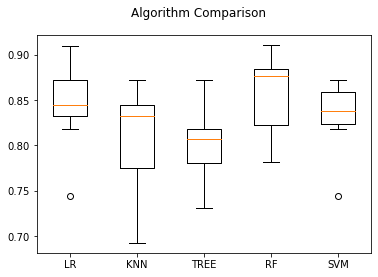

In [12]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()